In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [3]:
bank=pd.read_csv("bank.csv")

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
type(bank['default'])

pandas.core.series.Series

In [25]:
bank.isnull()
col_bank=bank.columns

In [29]:
for col in col_bank:
    print(sum(bank[col].isnull()))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [30]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


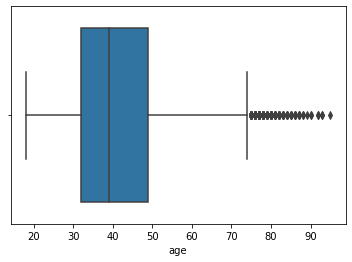

In [32]:
sns.boxplot(x=bank['age'])

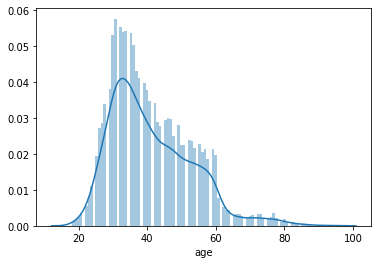

In [33]:
sns.distplot(bank.age,bins=100)

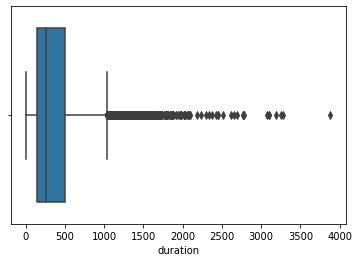

In [34]:
sns.boxplot(x=bank['duration'])

In [36]:
bankData=bank.copy()

In [43]:
bankData.columns
bankData.job
"""
management:1000
admin:600
...
이런식으로 만들기
"""

0             admin.
1             admin.
2         technician
3           services
4             admin.
            ...     
11157    blue-collar
11158       services
11159     technician
11160     technician
11161     technician
Name: job, Length: 11162, dtype: object

In [49]:
bankData['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [50]:
bankData.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [51]:
"""
deposit이 yes인 데이터에 한해서 개수를 출력
ex: admin 이면서 deposit이 yes인 데이터 건수

"""

'\ndeposit이 yes인 데이터에 한해서 개수를 출력\n'

In [59]:
bankData['job'][bankData['deposit']=='yes'].value_counts()

management       1301
technician        840
blue-collar       708
admin.            631
retired           516
services          369
student           269
unemployed        202
self-employed     187
entrepreneur      123
housemaid         109
unknown            34
Name: job, dtype: int64

In [74]:
bankData[bankData['deposit']=='yes'].groupby('job').size()

job
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
dtype: int64

In [85]:
jobset=set(bankData.job.values) # set은 for 문을 돌릴 수 없음(순서가 없기 때문)
jobs=list(jobset)

In [88]:
for j in jobs:
    print("{:15}:{:5}".format(j,len(bankData[(bankData.deposit=='yes') & (bankData.job==j)])))

unemployed     :  202
services       :  369
retired        :  516
housemaid      :  109
self-employed  :  187
management     : 1301
blue-collar    :  708
student        :  269
technician     :  840
admin.         :  631
unknown        :   34
entrepreneur   :  123


In [89]:
jobs
"""
management, admin => white-collar
services, housmaind => pink-collar
retired, student, unemplotment,unknown => other
"""

['unemployed',
 'services',
 'retired',
 'housemaid',
 'self-employed',
 'management',
 'blue-collar',
 'student',
 'technician',
 'admin.',
 'unknown',
 'entrepreneur']

In [107]:
bankData['job']=bankData['job'].replace(['management','admin.'],'white-collar')
bankData['job']=bankData['job'].replace(['services','housemaid'],'pink-collar')
bankData['job']=bankData['job'].replace(['retired','student','unemployed','unknown'],'other')

In [108]:
bankData.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [113]:
bankData['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [114]:
bankData['poutcome']=bankData['poutcome'].replace(['other'],'unknown')

In [115]:
bankData['poutcome'].value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [117]:
bankData['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [119]:
bankData.drop('contact',axis=1,inplace=True)
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [121]:
bankData['default'].value_counts()
"""
연습)
bankData['default_cat']=yes->1,no->0 추가
default는 제거
"""

no     10994
yes      168
Name: default, dtype: int64

In [125]:
bankData['default_cat']=bankData['default'].replace('yes',1).replace('no',0)

In [ ]:
bankData.drop('default',axis=1,inplace=True)

In [130]:
bankData['default_cat'].value_counts()

0    10994
1      168
Name: default_cat, dtype: int64

In [ ]:
bankData['default'].map({'yes':1,'no':0})
# map으로 할 때dictionary로 활용해도 가능

In [135]:
bankData['housing_cat']=bankData['housing'].map({'yes':1,'no':0})

In [136]:
bankData.drop('housing',axis=1,inplace=True)

In [137]:
bankData['loan_cat']=bankData['loan'].map({'yes':1,'no':0})
bankData.drop('loan',axis=1,inplace=True)

In [140]:
bankData.drop('day',axis=1,inplace=True)
bankData.drop('month',axis=1,inplace=True)

In [141]:
bankData

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,deposit,default_cat,housing_cat,loan_cat
0,59,white-collar,married,secondary,2343,1042,1,-1,0,unknown,yes,0,1,0
1,56,white-collar,married,secondary,45,1467,1,-1,0,unknown,yes,0,0,0
2,41,technician,married,secondary,1270,1389,1,-1,0,unknown,yes,0,1,0
3,55,pink-collar,married,secondary,2476,579,1,-1,0,unknown,yes,0,1,0
4,54,white-collar,married,tertiary,184,673,2,-1,0,unknown,yes,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,257,1,-1,0,unknown,no,0,1,0
11158,39,pink-collar,married,secondary,733,83,4,-1,0,unknown,no,0,0,0
11159,32,technician,single,secondary,29,156,2,-1,0,unknown,no,0,0,0
11160,43,technician,married,secondary,0,9,2,172,5,failure,no,0,0,1


In [142]:
bankData['deposit_cat']=bankData['deposit'].map({'yes':1,'no':0})
bankData.drop('deposit',axis=1,inplace=True)

In [147]:
len(bankData[bankData['pdays']==-1]) # 8324명 컨택 X
bankData['pdays'].max()   #854

854

In [164]:
bankData[bankData['pdays']==-1]['pdays'].replace(-1,10000)
np.where(bankData['pdays']==-1,10000,bankData['pdays'])

array([10000, 10000, 10000, ..., 10000,   172, 10000], dtype=int64)

In [163]:
bankData.loc[bankData['pdays']==-1,'pdays']=10000

In [166]:
bankData['pdays'].value_counts()  # pdays(고객과 대화한 일수)가 -1 경우 10000으로 바꿈

10000    8324
92        106
182        89
91         84
181        81
         ... 
587         1
579         1
515         1
491         1
683         1
Name: pdays, Length: 472, dtype: int64

In [168]:
bankData['recent_pdays']=np.where(bankData['pdays'],1/bankData['pdays'],1/bankData['pdays'])

In [169]:
bankData.drop("pdays",axis=1,inplace=True)

In [170]:
bankData.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,0.000100
11159,32,technician,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0,0.000100


In [173]:
bankWithDummies=pd.get_dummies(
    data=bankData,
               columns=['job','marital','education','poutcome'],
prefix=['job','marital','education','poutcome'])

In [174]:
bankWithDummies.head()


,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [175]:
bankWithDummies.shape

(11162, 27)

In [176]:
bankWithDummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


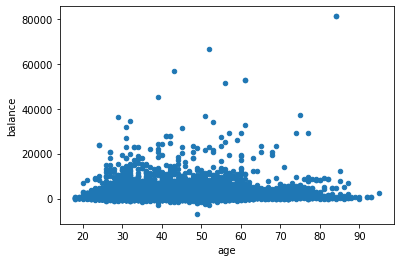

In [177]:
bankWithDummies.plot(kind='scatter',x='age',y='balance')

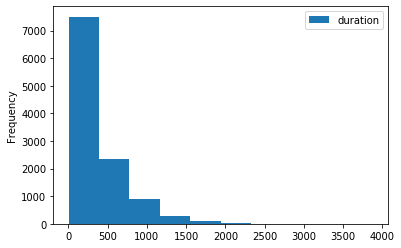

In [180]:
bankWithDummies.plot(kind='hist',x='poutcome_success',y='duration')

In [183]:
"계약기간이 만료된 사람들"
bankWithDummies[bankData.deposit_cat==1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [187]:
bankWithDummies[(bankData.deposit_cat==1) &
                (bankWithDummies.loan_cat) &
                (bankWithDummies.housing_cat)]

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
5,42,0,562,2,0,0,1,1,1,0.000100,...,0,0,1,0,0,1,0,0,0,1
6,56,830,1201,1,0,0,1,1,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
12,29,199,1689,4,0,0,1,1,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
19,49,168,513,1,0,0,1,1,1,0.000100,...,1,0,0,0,1,0,0,0,0,1
40,60,1262,1015,1,0,0,1,1,1,0.000100,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5223,51,5350,612,4,0,0,1,1,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
5237,24,-389,1242,1,0,0,1,1,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
5239,39,25,658,1,3,0,1,1,1,0.002849,...,0,1,0,0,1,0,0,1,0,0
5253,31,-537,1039,7,0,0,1,1,1,0.000100,...,0,1,0,1,0,0,0,0,0,1


In [188]:
len(bankWithDummies[(bankData.deposit_cat==1) &
                (bankWithDummies.loan_cat) &
                (bankWithDummies.housing_cat)])

265

In [195]:
"deposit_cat값이 1이면서 default_cat값이 1인사람 인원수 조사\
=> 채무가 있는데 정기예금을 한사람 찾기"

'deposit_cat값이 1이면서 default_cat값이 1인사람 인원수 조사=> 채무가 있는데 저축을 한사람 찾기'

In [194]:
len(bankWithDummies[(bankData['deposit_cat']==1) & (bankData['default_cat']==1)])

52

직업별 정기저축가입


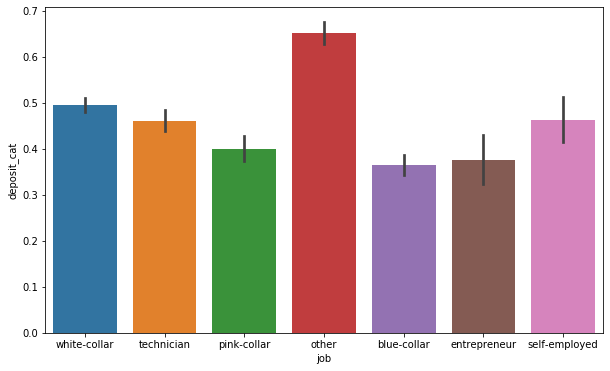

In [198]:
print("직업별 정기저축가입")
plt.figure(figsize=(10,6))
sns.barplot(x='job',y='deposit_cat',data=bankData)

In [199]:
bankwd=bankWithDummies

In [201]:
"상관계수 구하기"
corr=bankwd.corr()
corr

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


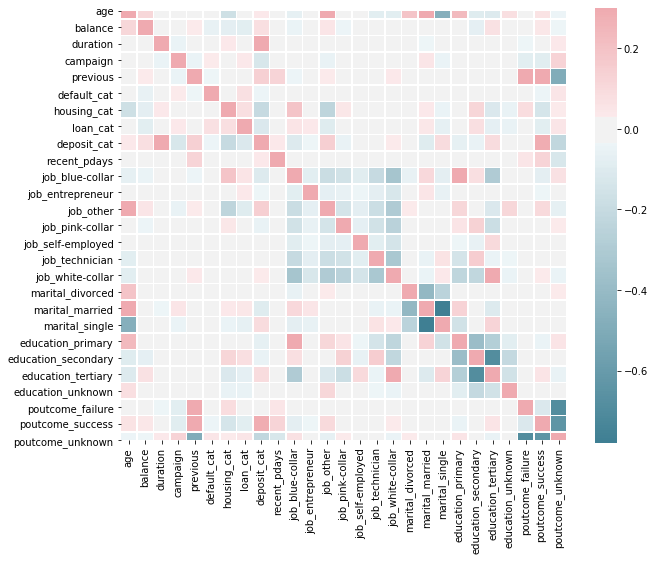

In [208]:
plt.figure(figsize=(10,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=cmap,linewidths=.5,
            square=True,center=0,vmax=.3,cbar_kws={'shrink':.80})

In [211]:
type(corr['deposit_cat'].drop('deposit_cat'))

pandas.core.series.Series

In [213]:
corr_deposit=pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))

In [221]:
corr_deposit.sort_values(by='deposit_cat',ascending=False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


In [222]:
bankwd

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0,1,0,0,0.000100,...,0,0,1,1,0,0,0,0,0,1
11158,39,733,83,4,0,0,0,0,0,0.000100,...,0,1,0,0,1,0,0,0,0,1
11159,32,29,156,2,0,0,0,0,0,0.000100,...,0,0,1,0,1,0,0,0,0,1
11160,43,0,9,2,5,0,0,1,0,0.005814,...,0,1,0,0,1,0,0,1,0,0


In [223]:
dropDeposit=bankwd.drop('deposit_cat',axis=1)   #입력변수
label=bankwd.deposit_cat #출력변수

In [224]:
#train_test_split(입력,출력,사이즈,랜덤)
dataTrain,dataTest,labelTrain,labelTest=train_test_split(dropDeposit,label,train_size=0.2,random_state=42)

In [226]:
dt2=tree.DecisionTreeClassifier(max_depth=2)
dt2.fit(dataTrain, labelTrain) # fit을 해줌
dt2_sc_train=dt2.score(dataTrain, labelTrain)
dt2_sc_test=dt2.score(dataTest, labelTest)

In [227]:
print("트레이닝스코어:",dt2_sc_train)
print("테스트스코어:",dt2_sc_test)

트레이닝스코어: 0.7670250896057348
테스트스코어: 0.7530795072788354


In [228]:
"depth :  3,4,5,6,10해보고 depth 생략하고해보기"
dt2=tree.DecisionTreeClassifier(max_depth=3)
dt2.fit(dataTrain, labelTrain) # fit을 해줌
dt2_sc_train=dt2.score(dataTrain, labelTrain)
dt2_sc_test=dt2.score(dataTest, labelTest)
print("(depth=3)트레이닝스코어:",dt2_sc_train)
print("(depth=3)테스트스코어:",dt2_sc_test)

트레이닝스코어: 0.7732974910394266
테스트스코어: 0.7559910414333707


In [231]:
dt4=tree.DecisionTreeClassifier(max_depth=4)
dt4.fit(dataTrain, labelTrain) # fit을 해줌
dt4_sc_train=dt4.score(dataTrain, labelTrain)
dt4_sc_test=dt4.score(dataTest, labelTest)
print("(depth4)트레이닝스코어:",dt4_sc_train)
print("(depth=4)테스트스코어:",dt4_sc_test)

(depth4)트레이닝스코어: 0.7885304659498208
(depth=4)테스트스코어: 0.7698768197088466


In [232]:
dt5=tree.DecisionTreeClassifier(max_depth=5)
dt5.fit(dataTrain, labelTrain) # fit을 해줌
dt5_sc_train=dt5.score(dataTrain, labelTrain)
dt5_sc_test=dt5.score(dataTest, labelTest)
print("(depth=5)트레이닝스코어:",dt5_sc_train)
print("(depth=5)테스트스코어:",dt5_sc_test)

(depth=5)트레이닝스코어: 0.8104838709677419
(depth=5)테스트스코어: 0.7795072788353863


In [239]:
dt10=tree.DecisionTreeClassifier(max_depth=10)
dt10.fit(dataTrain, labelTrain) # fit을 해줌
dt10_sc_train=dt10.score(dataTrain, labelTrain)
dt10_sc_test=dt10.score(dataTest, labelTest)
print("(depth=10)트레이닝스코어:",dt10_sc_train)
print("(depth=10)테스트스코어:",dt10_sc_test)

(depth=10)트레이닝스코어: 0.9054659498207885
(depth=10)테스트스코어: 0.7602463605823069


In [234]:
dt_defaultdepth=tree.DecisionTreeClassifier()
dt_defaultdepth.fit(dataTrain, labelTrain) # fit을 해줌
dt_defaultdepth_sc_train=dt_defaultdepth.score(dataTrain, labelTrain)
dt_defaultdepth_sc_test=dt_defaultdepth.score(dataTest, labelTest)
print("(depth=default)트레이닝스코어:",dt_defaultdepth_sc_train)
print("(depth=default)테스트스코어:",dt_defaultdepth_sc_test)

(depth=default)트레이닝스코어: 1.0
(depth=default)테스트스코어: 0.7302351623740202


In [241]:
dt_defaultdepth.get_depth()

20

In [240]:
dt3=tree.DecisionTreeClassifier(max_depth=3)
dt3.fit(dataTrain, labelTrain) # fit을 해줌
dt3_sc_train=dt3.score(dataTrain, labelTrain)
dt3_sc_test=dt3.score(dataTest, labelTest)
print("(depth=10)트레이닝스코어:",dt3_sc_train)
print("(depth=10)테스트스코어:",dt3_sc_test)

(depth=10)트레이닝스코어: 0.7732974910394266
(depth=10)테스트스코어: 0.7559910414333707
